[0.03159499 0.98698776] 0
[-0.38289117 -0.09084004] 1
[-0.17749658  0.93049627] 1


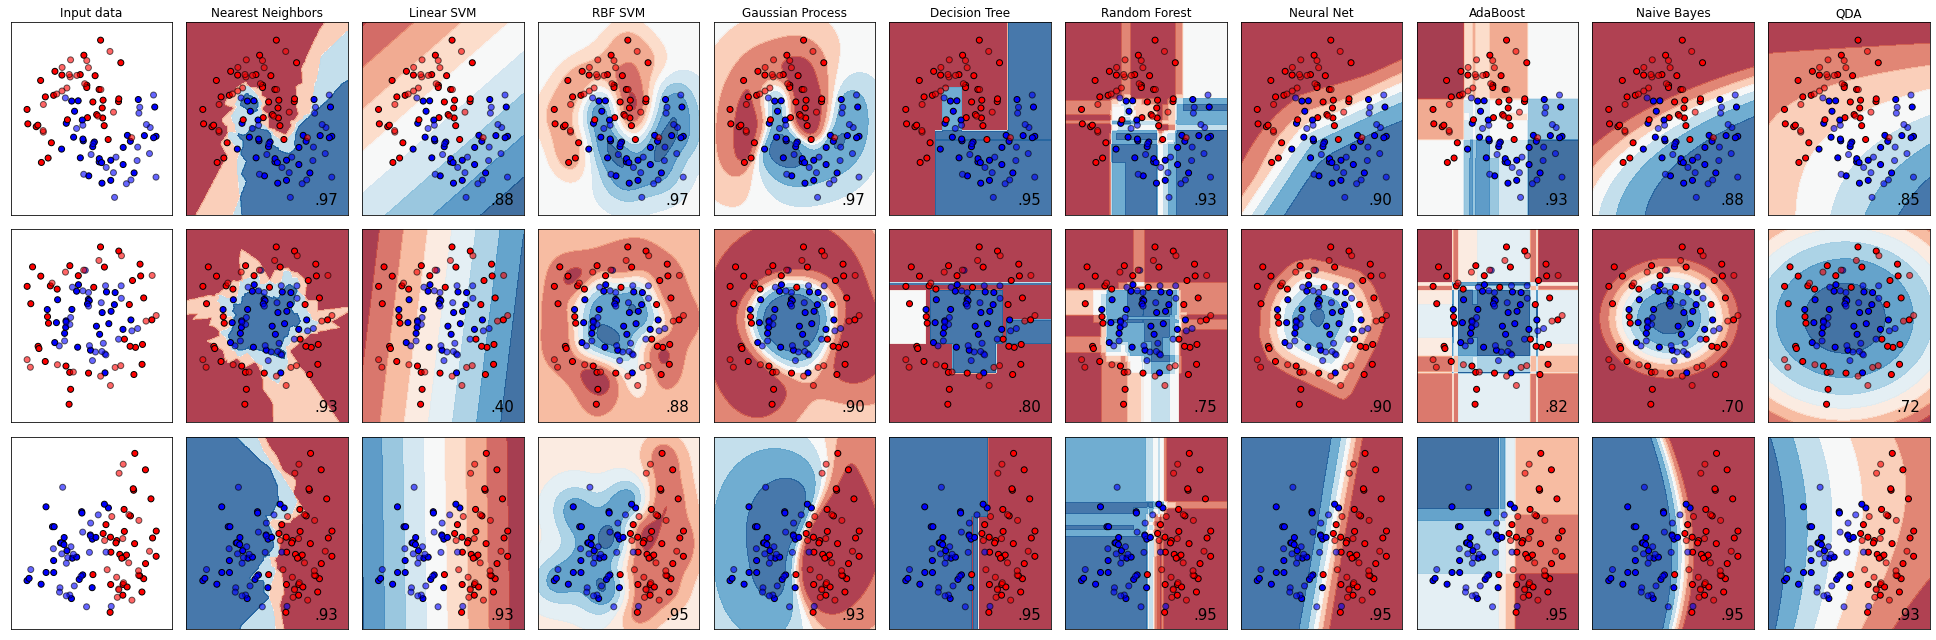

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    print(X[0], y[0])
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

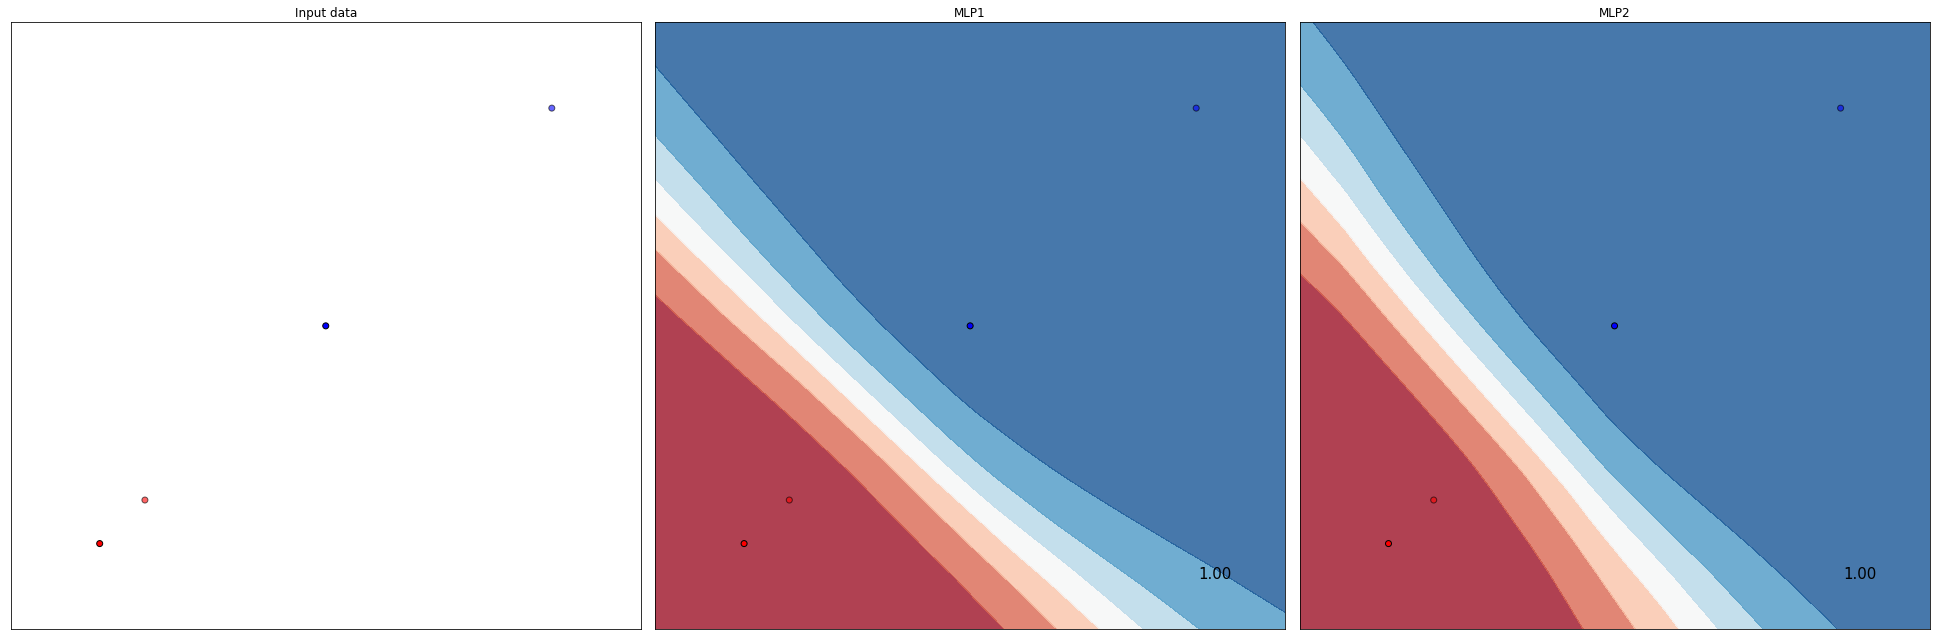

In [2]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=1000),
    MLPClassifier(max_iter=10000)]

figure = plt.figure(figsize=(27, 9))
i = 1

datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

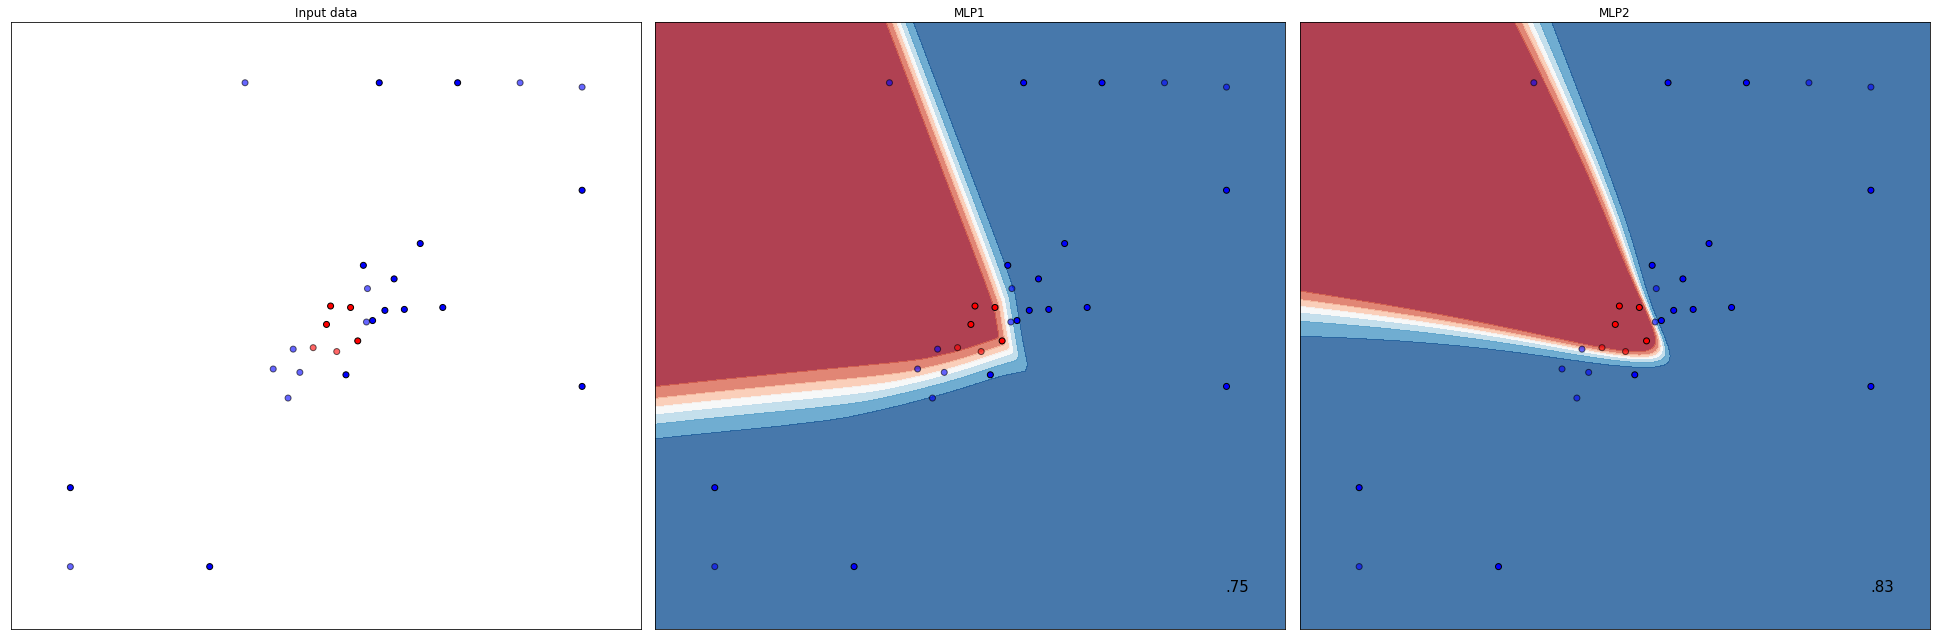

In [3]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=100000),
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

figure = plt.figure(figsize=(27, 9))
i = 1

#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_4.txt'
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


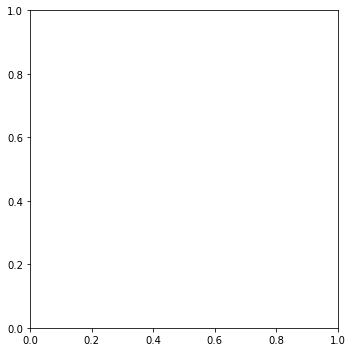

In [4]:
import matplotlib.animation as animation

names = ["Circle 3"]

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_3_3.txt'
#1_mlp_plt_gen.txt Line line_{}.png 40
#1_mlp_plt_gen_2.txt Arc arc_{}.png 30
#1_mlp_plt_gen_3.txt Circle circle_{}.png 100
#1_mlp_plt_gen_3_2.txt Circle 2 circle_2_{}.png 100
#1_mlp_plt_gen_3_3.txt Circle 3 circle_3_{}.png 100
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]

def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X, y = X[:frame+2], y[:frame+2]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/circle_3_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)


#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(100):
    animate(i)

In [5]:
import imageio
with imageio.get_writer('img/3_3.gif', mode='I') as writer:
    for i in range(100):
        filename = 'img/circle_3_{}.png'.format(i)
        image = imageio.imread(filename)
        writer.append_data(image)

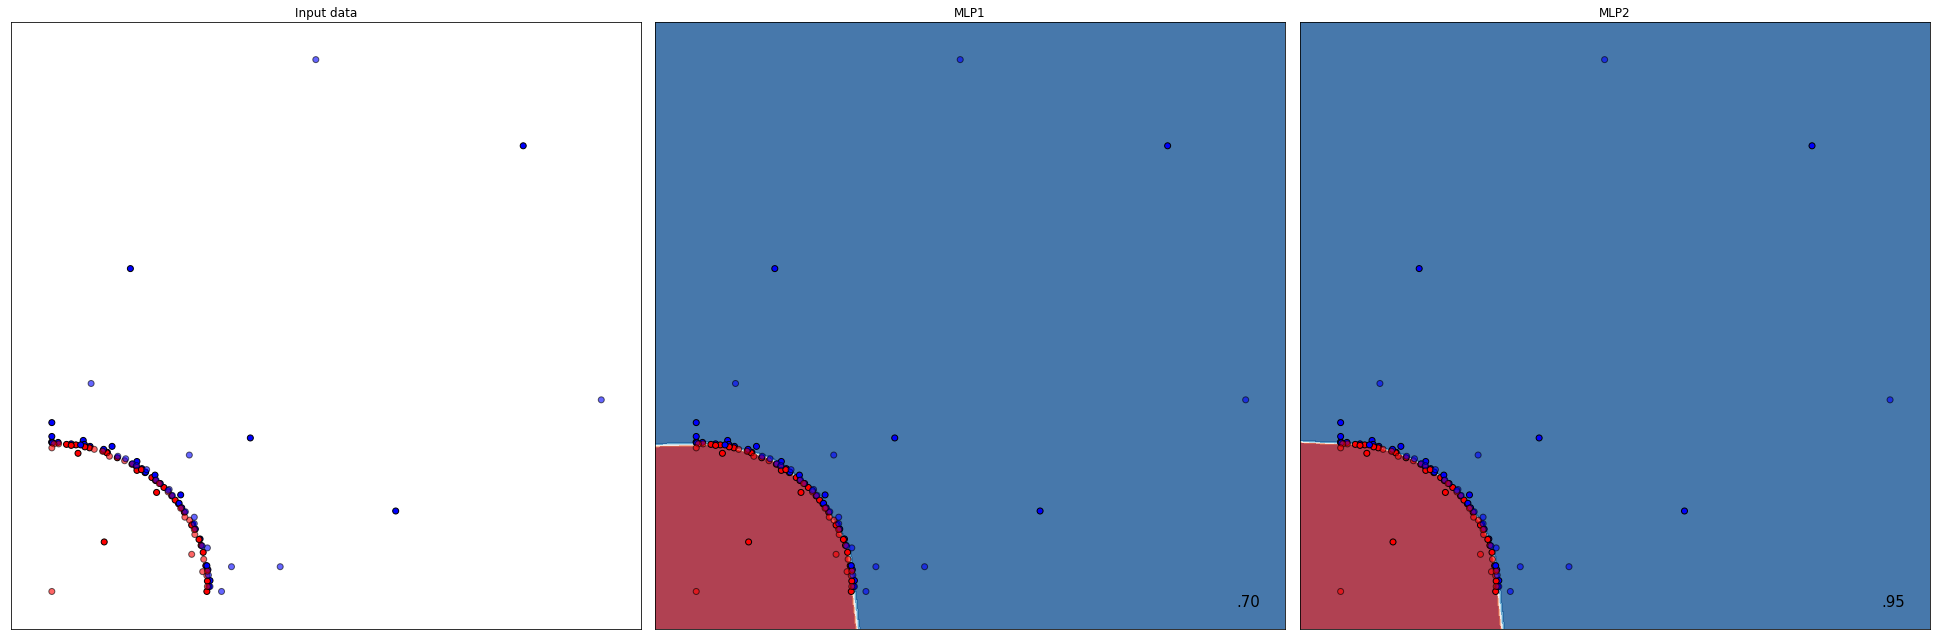

In [6]:
names = ["MLP1", "MLP2"]

classifiers = [
    MLPClassifier(max_iter=100000),
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

figure = plt.figure(figsize=(27, 9))
i = 1

#datasets = [(np.array([[0,0],[1,1],[0.5,0.5],[0.1,0.1]]), np.array([0,1,1,0]))]
ex_name = '1_mlp_plt_gen_2.txt'
folder_name = 'ml_threads/'
f_name = folder_name + ex_name
with open(f_name, 'r') as f:
    threads = f.readlines()

x_train, y_train = [], []
for t in threads:
    tr = list(map(float, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
datasets = [(np.array(x_train), np.array(y_train))]


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [24]:
data = '''351.txt
0
303.txt
0
257.txt
0
280.txt
0
234.txt
0
187.txt
0
140.txt
0
21.txt
0
69.txt
0
92.txt
0
790.txt
1
924.txt
1
709.txt
1
327.txt
0
702.txt
0
869.txt
1
550.txt
0
539.txt
0
506.txt
0
560.txt
0
588.txt
825.txt
0
594.txt
0
777.txt
0
674.txt
0
1000.txt
524.txt
0
746.txt
24.txt
0
542.txt
0
661.txt
521.txt
0
799.txt
692.txt
1
681.txt
902.txt
1
666.txt
607.txt
0
901.txt
755.txt
1
655.txt
1'''

N1 = 25
N2 = 201
strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

X = {}
i = 0
for s in strike_energy:
    for p in protection_thickness:
        X[i] = [s, p]
        i += 1

x_train_2, y_train_2 = [], []
        
ls = data.split()
print(ls)
for i in range(len(ls)-1):
    if 'txt' in ls[i]:
        if ls[i+1] in '01':
            t_id = int(ls[i].replace('.txt', ''))
            print(t_id, ls[i+1], X[t_id])
            x_train_2.append(X[t_id])
            y_train_2.append(int(ls[i+1]))
print(len(y_train_2))

['351.txt', '0', '303.txt', '0', '257.txt', '0', '280.txt', '0', '234.txt', '0', '187.txt', '0', '140.txt', '0', '21.txt', '0', '69.txt', '0', '92.txt', '0', '790.txt', '1', '924.txt', '1', '709.txt', '1', '327.txt', '0', '702.txt', '0', '869.txt', '1', '550.txt', '0', '539.txt', '0', '506.txt', '0', '560.txt', '0', '588.txt', '825.txt', '0', '594.txt', '0', '777.txt', '0', '674.txt', '0', '1000.txt', '524.txt', '0', '746.txt', '24.txt', '0', '542.txt', '0', '661.txt', '521.txt', '0', '799.txt', '692.txt', '1', '681.txt', '902.txt', '1', '666.txt', '607.txt', '0', '901.txt', '755.txt', '1', '655.txt', '1']
351 0 [3.5, 2.25]
303 0 [3.0, 2.75]
257 0 [2.5, 3.75]
280 0 [2.75, 3.25]
234 0 [2.25, 4.25]
187 0 [1.75, 5.0]
140 0 [1.25, 5.75]
21 0 [0.0, 7.25]
69 0 [0.5, 6.75]
92 0 [0.75, 6.25]
790 1 [7.75, 5.75]
924 1 [9.0, 8.0]
709 1 [7.0, 4.25]
327 0 [3.25, 2.5]
702 0 [7.0, 2.5]
869 1 [8.5, 6.75]
550 0 [5.5, 2.0]
539 0 [5.25, 5.5]
506 0 [5.0, 3.5]
560 0 [5.5, 4.5]
825 0 [8.25, 2.0]
594 0 [5.75

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


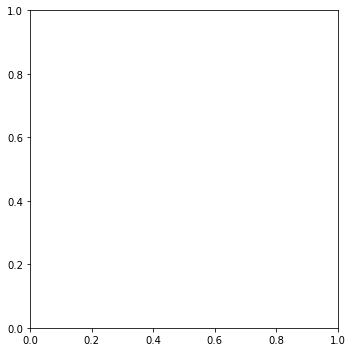

In [25]:
import matplotlib.animation as animation

names = ["Gcm Cubic"]

classifiers = [
    MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]
#MLPClassifier(max_iter=100000, random_state=42)]
#MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(90, 90, 90), max_iter=100000, random_state=42)]

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_tight_layout(True)


base_ids = {0: 0, 6: 0, 12: 0, 18: 0, 24: 1, 1250: 1, 1256: 1, 1262: 1, 1268: 1, 1274: 1, 2500: 1, 2506: 1, 2512: 1, 2518: 1, 2524: 1, 3750: 1, 3756: 1, 3762: 1, 3768: 1, 3774: 1, 5000: 1, 5006: 1, 5012: 1, 5018: 1, 5024: 1}
N1 = 25
N2 = 201
strike_energy = np.linspace(0, 50, N2, endpoint=True)
strike_energy = list(map(lambda x: round(x, 5), strike_energy))

protection_thickness = np.linspace(2.0, 8.0, N1, endpoint=True)
protection_thickness = list(map(lambda x: round(x, 5), protection_thickness))

x_train, y_train = [], []
i = 0
for s in strike_energy:
    for p in protection_thickness:
        if i in base_ids:
            x_train.append([s, p])
            y_train.append(base_ids[i])
        i += 1

x_train, y_train = x_train + x_train_2, y_train + y_train_2
        
datasets = [(np.array(x_train), np.array(y_train))]

def animate(frame):
    print(frame)
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X, y = X[:frame+25], y[:frame+25]
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))



        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            #ax.clear()
            #ax = fig.add_subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X, y)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            #return ax
            filename = 'img/gcm_1_{}.png'.format(frame)
            plt.savefig(filename)
            ax.clear()

#plt.tight_layout()
#plt.show()

#ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)


#plt.show()
#ani.save('1.gif', writer='imagemagick', fps=30)
for i in range(34):
    animate(i)
    #break

In [26]:
import imageio
with imageio.get_writer('img/gcm_1.gif', mode='I') as writer:
    for i in range(34):
        filename = 'img/gcm_1_{}.png'.format(i)
        image = imageio.imread(filename)
        writer.append_data(image)

['351.txt', '0', '327.txt', '303.txt', '0', '702.txt', '257.txt', '0', '539.txt', '280.txt', '0', '924.txt', '234.txt', '0', '187.txt', '0', '709.txt', '140.txt', '0', '21.txt', '0', '69.txt', '0', '550.txt', '92.txt', '0', '869.txt', '790.txt', '1', '655.txt']
351 0 [3.5, 2.25]
303 0 [3.0, 2.75]
257 0 [2.5, 3.75]
280 0 [2.75, 3.25]
234 0 [2.25, 4.25]
187 0 [1.75, 5.0]
140 0 [1.25, 5.75]
21 0 [0.0, 7.25]
69 0 [0.5, 6.75]
92 0 [0.75, 6.25]
790 1 [7.75, 5.75]
